Synthetic dataset generated and saved to dataset/synthetic_ai_readiness_data.csv

First 5 rows of the synthetic dataset:
             Industry Employees     Revenue  Tech_CRM  Tech_Cloud  \
0           Education     11-50     $1M-$5M         1           1   
1          Healthcare     11-50      $100M+         0           1   
2  Financial Services   201-500  $20M-$100M         0           1   
3           Education     11-50    $5M-$20M         1           1   
4       Manufacturing     11-50     $1M-$5M         1           0   

   Tech_Analytics  Tech_Marketing  Tech_API  Tech_BI  Tech_Support  \
0               0               1         0        0             0   
1               0               0         0        0             0   
2               0               0         0        0             1   
3               0               0         0        0             0   
4               0               1         1        1             0   

   Tech_ECommerce Cloud_Infra  Support_Tick

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


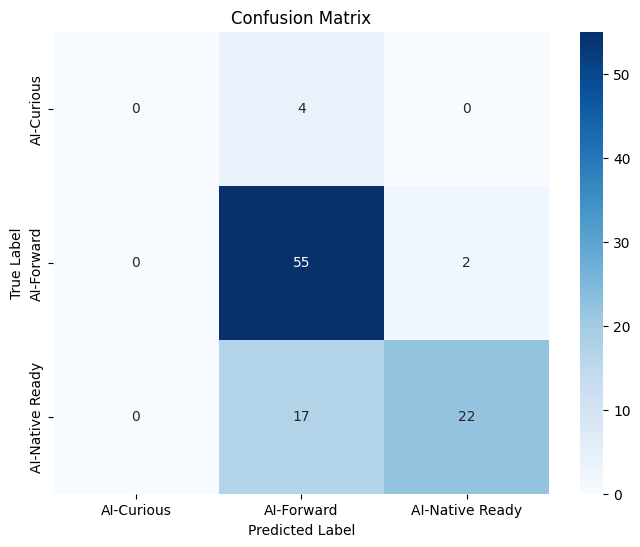


Model pipeline saved to ml_models/ai_readiness_classifier_pipeline.joblib

--- Demonstrating Prediction on New Data ---

New Company Data:
{'Industry': 'SaaS', 'Employees': '51-200', 'Revenue': '$5M-$20M', 'Tech_CRM': 1, 'Tech_Cloud': 1, 'Tech_Analytics': 1, 'Tech_Marketing': 0, 'Tech_API': 1, 'Tech_BI': 1, 'Tech_Support': 0, 'Tech_ECommerce': 0, 'Cloud_Infra': 'AWS', 'Support_Tickets': 700, 'Sales_Process': 'Automated', 'Data_Volume_GB': 1500, 'LinkedIn_Presence': 1, 'Website_Traffic': 25000, 'Current_AI_Adoption': 'Pilot'}

Predicted AI Readiness Level: AI-Native Ready

Low Readiness Company Data:
{'Industry': 'Education', 'Employees': '1-10', 'Revenue': '<$1M', 'Tech_CRM': 0, 'Tech_Cloud': 0, 'Tech_Analytics': 0, 'Tech_Marketing': 0, 'Tech_API': 0, 'Tech_BI': 0, 'Tech_Support': 0, 'Tech_ECommerce': 0, 'Cloud_Infra': 'On-premise only', 'Support_Tickets': 50, 'Sales_Process': 'Manual', 'Data_Volume_GB': 100, 'LinkedIn_Presence': 0, 'Website_Traffic': 500, 'Current_AI_Adoption': 'None

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # For saving the model
import os # Import the os module to handle directories

# --- 1. Generate Synthetic Dataset ---
# This dataset mimics the inputs from your React app and a hypothetical 'AI_Readiness_Level' outcome.
# In a real-world scenario, you would replace this with actual historical company data.

np.random.seed(42) # for reproducibility

num_samples = 500

# Features
industries = ['SaaS', 'E-commerce', 'Manufacturing', 'Healthcare', 'Financial Services', 'Real Estate', 'Education', 'Other']
employee_ranges = ['1-10', '11-50', '51-200', '201-500', '500+']
revenue_ranges = ['<$1M', '$1M-$5M', '$5M-$20M', '$20M-$100M', '$100M+']
tech_stacks = ['CRM', 'Cloud', 'Analytics', 'Marketing', 'API', 'BI', 'Support', 'E-commerce']
cloud_infras = ['AWS', 'Azure', 'Google Cloud', 'On-premise only', 'Hybrid']
sales_processes = ['Manual', 'Documented', 'Automated', 'Optimized']
current_ais = ['None', 'Planning', 'Pilot', 'Active']

data = {
    'Industry': np.random.choice(industries, num_samples),
    'Employees': np.random.choice(employee_ranges, num_samples, p=[0.15, 0.25, 0.3, 0.2, 0.1]), # Skewed towards mid-size
    'Revenue': np.random.choice(revenue_ranges, num_samples, p=[0.1, 0.2, 0.3, 0.25, 0.15]), # Skewed towards mid-revenue
    'Tech_CRM': np.random.randint(0, 2, num_samples), # Binary: 0 or 1
    'Tech_Cloud': np.random.randint(0, 2, num_samples),
    'Tech_Analytics': np.random.randint(0, 2, num_samples),
    'Tech_Marketing': np.random.randint(0, 2, num_samples),
    'Tech_API': np.random.randint(0, 2, num_samples),
    'Tech_BI': np.random.randint(0, 2, num_samples),
    'Tech_Support': np.random.randint(0, 2, num_samples),
    'Tech_ECommerce': np.random.randint(0, 2, num_samples),
    'Cloud_Infra': np.random.choice(cloud_infras, num_samples),
    'Support_Tickets': np.random.randint(10, 2000, num_samples), # Range of monthly tickets
    'Sales_Process': np.random.choice(sales_processes, num_samples, p=[0.1, 0.2, 0.4, 0.3]),
    'Data_Volume_GB': np.random.randint(50, 5000, num_samples), # Range of monthly data volume
    'LinkedIn_Presence': np.random.randint(0, 2, num_samples),
    'Website_Traffic': np.random.randint(100, 100000, num_samples), # Range of monthly visitors
    'Current_AI_Adoption': np.random.choice(current_ais, num_samples, p=[0.25, 0.3, 0.25, 0.2])
}

df = pd.DataFrame(data)

# Create a target variable: AI_Readiness_Level (Beginner, Curious, Forward, Native Ready)
# This is a simplified function to generate a plausible readiness level based on some features.
# In a real scenario, this would be an actual measured outcome.
def assign_readiness_level(row):
    score = 0
    # Add points based on certain features
    if row['Cloud_Infra'] in ['AWS', 'Azure', 'Google Cloud']: score += 2
    if row['Cloud_Infra'] == 'Hybrid': score += 1

    if row['Tech_CRM']: score += 0.5
    if row['Tech_Cloud']: score += 1
    if row['Tech_Analytics']: score += 0.5
    if row['Tech_API']: score += 0.5

    if row['Employees'] in ['201-500', '500+']: score += 1
    if row['Revenue'] in ['$20M-$100M', '$100M+']: score += 1

    if row['Support_Tickets'] > 500: score += 1
    if row['Data_Volume_GB'] > 1000: score += 1
    if row['Website_Traffic'] > 10000: score += 1

    if row['Sales_Process'] == 'Optimized': score += 1
    elif row['Sales_Process'] == 'Automated': score += 0.5

    if row['LinkedIn_Presence']: score += 0.5

    if row['Current_AI_Adoption'] == 'Active': score += 2
    elif row['Current_AI_Adoption'] == 'Pilot': score += 1
    elif row['Current_AI_Adoption'] == 'Planning': score += 0.5

    # Assign levels based on a threshold
    if score >= 8:
        return 'AI-Native Ready'
    elif score >= 5:
        return 'AI-Forward'
    elif score >= 2:
        return 'AI-Curious'
    else:
        return 'AI-Beginner'

df['AI_Readiness_Level'] = df.apply(assign_readiness_level, axis=1)

# Save the synthetic dataset (optional, but good for reproducibility and sharing)
# Ensure the 'dataset' directory exists before saving
os.makedirs('dataset', exist_ok=True)
df.to_csv('dataset/synthetic_ai_readiness_data.csv', index=False)
print("Synthetic dataset generated and saved to dataset/synthetic_ai_readiness_data.csv")
print("\nFirst 5 rows of the synthetic dataset:")
print(df.head())
print("\nAI Readiness Level distribution:")
print(df['AI_Readiness_Level'].value_counts())

# --- 2. Data Preprocessing ---

# Define features (X) and target (y)
X = df.drop('AI_Readiness_Level', axis=1)
y = df['AI_Readiness_Level']

# Encode target variable (AI_Readiness_Level)
# LabelEncoder is suitable for target variables in classification
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Ensure the 'ml_models' directory exists before saving the encoder
os.makedirs('ml_models', exist_ok=True)
# Save the encoder to inverse transform predictions later
joblib.dump(le, 'ml_models/label_encoder.joblib')
print(f"\nEncoded AI Readiness Levels: {le.classes_}")

# Define categorical and numerical features for preprocessing
categorical_features = ['Industry', 'Employees', 'Revenue', 'Cloud_Infra', 'Sales_Process', 'Current_AI_Adoption']
binary_features = ['Tech_CRM', 'Tech_Cloud', 'Tech_Analytics', 'Tech_Marketing', 'Tech_API', 'Tech_BI', 'Tech_Support', 'Tech_ECommerce', 'LinkedIn_Presence']
numerical_features = ['Support_Tickets', 'Data_Volume_GB', 'Website_Traffic']

# Create preprocessing pipelines for numerical and categorical features
numerical_transformer = StandardScaler() # Standardize numerical features
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # One-hot encode categorical features

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('bin', 'passthrough', binary_features) # Binary features are already numerical (0/1), pass through
    ],
    remainder='drop' # Drop any columns not specified
)

# --- 3. Model Selection and Training ---

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Create a pipeline that first preprocesses the data then applies the RandomForestClassifier
# RandomForestClassifier is chosen for its robustness, ability to handle various feature types,
# and good performance on many classification tasks.
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'))
])

# Train the model
print("\nTraining the RandomForestClassifier model...")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")

# --- 4. Performance Evaluation ---

# Make predictions on the test set
y_pred = model_pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Visualize Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- 5. Save the Trained Model ---
# Save the entire pipeline (preprocessor + classifier) for future use
# Ensure the 'ml_models' directory exists before saving the pipeline
os.makedirs('ml_models', exist_ok=True)
joblib.dump(model_pipeline, 'ml_models/ai_readiness_classifier_pipeline.joblib')
print("\nModel pipeline saved to ml_models/ai_readiness_classifier_pipeline.joblib")

# --- 6. Demonstrate Prediction on New Data ---
print("\n--- Demonstrating Prediction on New Data ---")

# Example new company data (structured like your React app's companyData)
new_company_data = pd.DataFrame([{
    'Industry': 'SaaS',
    'Employees': '51-200',
    'Revenue': '$5M-$20M',
    'Tech_CRM': 1,
    'Tech_Cloud': 1,
    'Tech_Analytics': 1,
    'Tech_Marketing': 0,
    'Tech_API': 1,
    'Tech_BI': 1,
    'Tech_Support': 0,
    'Tech_ECommerce': 0,
    'Cloud_Infra': 'AWS',
    'Support_Tickets': 700,
    'Sales_Process': 'Automated',
    'Data_Volume_GB': 1500,
    'LinkedIn_Presence': 1,
    'Website_Traffic': 25000,
    'Current_AI_Adoption': 'Pilot'
}])

# Load the saved pipeline and label encoder (simulate loading in a deployment environment)
loaded_pipeline = joblib.load('ml_models/ai_readiness_classifier_pipeline.joblib')
loaded_le = joblib.load('ml_models/label_encoder.joblib')

# Predict the AI Readiness Level for the new data
predicted_level_encoded = loaded_pipeline.predict(new_company_data)
predicted_level = loaded_le.inverse_transform(predicted_level_encoded)

print(f"\nNew Company Data:\n{new_company_data.iloc[0].to_dict()}")
print(f"\nPredicted AI Readiness Level: {predicted_level[0]}")

# Another example: A company with less readiness
new_company_data_low_readiness = pd.DataFrame([{
    'Industry': 'Education',
    'Employees': '1-10',
    'Revenue': '<$1M',
    'Tech_CRM': 0,
    'Tech_Cloud': 0,
    'Tech_Analytics': 0,
    'Tech_Marketing': 0,
    'Tech_API': 0,
    'Tech_BI': 0,
    'Tech_Support': 0,
    'Tech_ECommerce': 0,
    'Cloud_Infra': 'On-premise only',
    'Support_Tickets': 50,
    'Sales_Process': 'Manual',
    'Data_Volume_GB': 100,
    'LinkedIn_Presence': 0,
    'Website_Traffic': 500,
    'Current_AI_Adoption': 'None'
}])

predicted_level_encoded_low = loaded_pipeline.predict(new_company_data_low_readiness)
predicted_level_low = loaded_le.inverse_transform(predicted_level_encoded_low)

print(f"\nLow Readiness Company Data:\n{new_company_data_low_readiness.iloc[0].to_dict()}")
print(f"\nPredicted AI Readiness Level (Low Readiness): {predicted_level_low[0]}")